In [202]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt


In [203]:
path="/content/Data & AI Jobs in Egypt _ Trello.html"
with open(path) as file:
  soup = BeautifulSoup(file, 'html.parser')

In [204]:
name=[]
for i in range(141):
  name.append(soup.find_all("span",class_="list-card-title js-card-name")[i].contents[1])

In [205]:
title=""
list=[]
for j in range(141):
  title=""
  for i in soup.find_all("div",class_="list-card-labels js-card-labels")[j].contents:
    title+=i.contents[0].contents[0]+","
  
  list.append(title)

In [206]:
data = {name[i]:list[i] for i in range(141)}
df=pd.DataFrame.from_dict(data, orient='index',columns=["Job"])

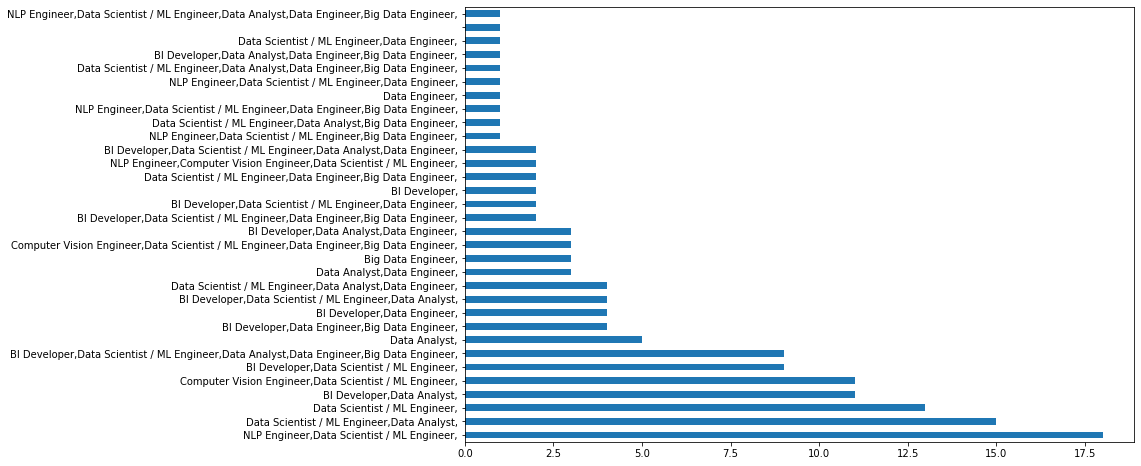

In [207]:
df['Job'].value_counts().plot.barh(figsize=(12,8))
plt.show()

In [208]:
x=df["Job"].apply(lambda x:x.split(","))
for i in x:
  i.remove("")

In [209]:
keywords={}
for i in x:
  for j in i:
    if j in keywords:
      keywords[j]+=1
    else:
      keywords[j]=1

In [212]:
df1=pd.DataFrame.from_dict(keywords, orient='index',columns=["Job"])

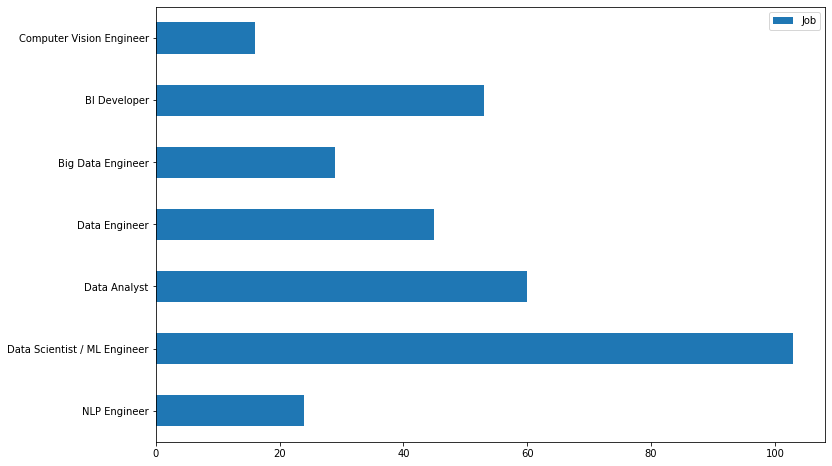

In [215]:
df1.plot.barh(figsize=(12,8))